Saturation curves for SM-omics and ST<br>

Input files are generated by counting number of unique molecules and number of annotated reads per annotated region after adjusting for sequencing depth, in downsampled fastq files (proportions 0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1) processed using ST-pipeline.<br>


In [1]:
%matplotlib inline
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
import warnings
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

In [2]:
def condition(row):
    """ Takes row in pandas df as input and returns type of condition
    
    """
    # The samples are run in triplicate based on condition
    condition = ['HE', 'DAPI', 'Nestin']

    if row['Name'] in ['10015CN108fl_D1', '10015CN108fl_D2', '10015CN108fl_E2']: 
        return condition[2]
        
    elif row['Name'] in ['10015CN90_C2', '10015CN90_D2', '10015CN90_E2']:
        return condition[1]
    
    elif row['Name'] in ['10015CN108_C2', '10015CN108_D2', '10015CN108_E1']:
        return condition[0]
    

In [3]:
# Load input files
path = '../../smomics_data'

stats_list = []

samples_list = ['10015CN108fl_D2',
         '10015CN108fl_E2',
         '10015CN108fl_D1',
         '10015CN90_C2',
         '10015CN90_D2',
         '10015CN90_E2',
        '10015CN108_C2',
         '10015CN108_D2',
         '10015CN108_E1']  

prop_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
    
for filename in samples_list:
    
    cond_file = pd.read_csv(os.path.join(path, filename + '_umi_after_seq_depth_in_spots_under_outside_tissue.txt'), sep = '\t')
    print(cond_file)
    
    cond_file.sort_values(by='Num reads', inplace=True)
    cond_file['Prop_annot_reads'] = prop_list
    
    cond_file['Condition'] = cond_file.apply(lambda row: condition(row), axis = 1)
    cond_file['norm uniq mol inside'] = cond_file['UMI inside'] 
    cond_file['norm uniq mol outside'] = cond_file['UMI outside'] 

    stats_list.append(cond_file)

# Concat all files
cond_merge = pd.concat(stats_list)
    

              Name   UMI inside  UMI outside  Annot reads  Num reads
0  10015CN108fl_D2  1652.046382   473.860000      1907392    4662511
1  10015CN108fl_D2    67.087199    19.870416        95804     234342
2  10015CN108fl_D2  2840.152134   827.202643      3817126    9323742
3  10015CN108fl_D2  4513.573284  1307.220779      7631441   18646203
4  10015CN108fl_D2   443.834879   127.594406       478334    1166588
5  10015CN108fl_D2  3759.378479  1092.888646      5725184   13984972
6  10015CN108fl_D2   892.339518   254.421053       955083    2331896
7  10015CN108fl_D2  5150.267161  1492.917927      9541620   23307433
8  10015CN108fl_D2     3.310409     1.135770         9955      24587
              Name   UMI inside  UMI outside  Annot reads  Num reads
0  10015CN108fl_E2  6228.368327  1223.207459     10076042   23956531
1  10015CN108fl_E2  1057.925267   205.416256      1260065    2994865
2  10015CN108fl_E2   484.259786   100.146096       630260    1497603
3  10015CN108fl_E2     3.185383   

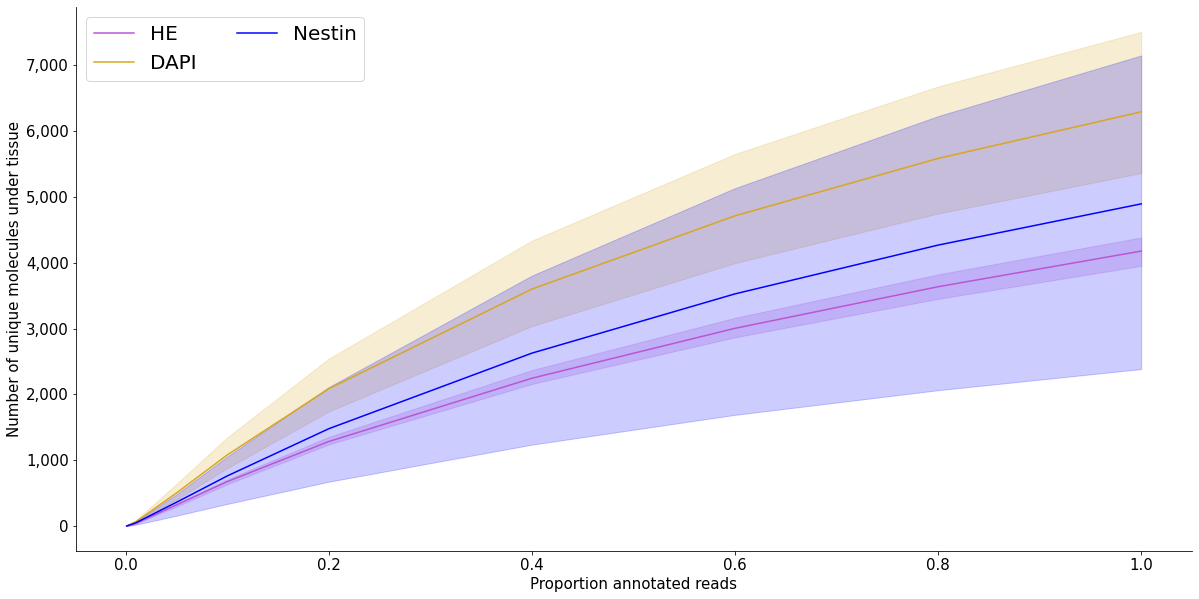

In [4]:
#Plot 
fig = plt.figure(figsize=(20, 10))
x="Prop_annot_reads"
y="norm uniq mol inside"
#y="Genes"
hue='Condition'

################ LINE PLOT

ax = sns.lineplot(x=x, y=y, data=cond_merge,hue=hue, 
                  palette = ['mediumorchid', 'goldenrod', 'blue'], hue_order = ['HE', 'DAPI', 'Nestin'],ci=95)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')

# X and y label size
ax.set_xlabel("Proportion annotated reads", fontsize=15)
ax.set_ylabel("Number of unique molecules under tissue", fontsize=15)

# Set ticks size
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

# change background color
back_c = 'white'
ax.set_facecolor(back_c)
ax.grid(False)

# Thousand seprator on y axis
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=['HE', 'DAPI', 'Nestin'],loc='upper left', ncol=2, fontsize=20)


fig.set_size_inches(20, 10)
# plt.savefig("../../figures/saturation_sm_stainings_saturation.pdf", transparent=True, bbox_inches = 'tight',
#      pad_inches = 0, dpi=1200)
plt.show()

In [5]:
cond_file['Prop_annot_reads'] = 100*cond_file['Prop_annot_reads']

In [6]:
cond_merge.to_csv('../../smomics_data/sm_stainings_unique_molecules_under_outside_tissue.csv')